# CS381 Data Analytics Final Project

### Due on 5/13/2020 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 


Attribute Information:

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### However, I have modified the dataset and so you will need to load the dataset by reading a csv file I provided. In particular, I changed 50K to 80K just to reflect the inflation 

In [4]:
df = pd.read_csv("adult_income_modified.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=80K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=80K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=80K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=80K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=80K


### Your task is to build a model that can predict whether a people will earn <= 80K or > 80K

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped at 20 points for the whole final project



### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


First change the target variable salary to 0 and 1

In [5]:
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


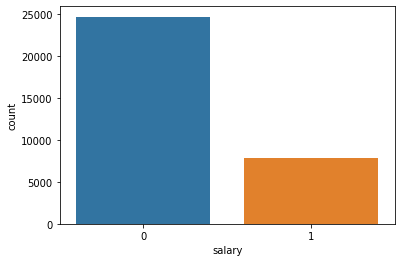

In [6]:
sns.countplot(df['salary'])

### Good Luck !!!

Show all your work below

# EDA

In [7]:
df.shape

(32571, 15)

Check for unknown values

In [8]:
for i,j in zip(df.columns,(df.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' records')

workclass: 1836 records
occupation: 1843 records
native-country: 583 records


Data with unknown values seems relatively few, so I'll just remove them

In [9]:
df.replace('?', np.nan, inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(30172, 15)

Now, lets see if we have any outliers

In [12]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,-0.076033,0.042992,0.079221,0.058706,0.097945,0.238747
fnlwgt,-0.076033,1.000000,-0.045184,0.000375,-0.008402,-0.018298,-0.009112
education-num,0.042992,-0.045184,1.000000,0.124404,0.079385,0.150591,0.335303
capital-gain,0.079221,0.000375,0.124404,1.000000,-0.032255,0.079535,0.221190
capital-loss,0.058706,-0.008402,0.079385,-0.032255,1.000000,0.057228,0.149698
hours-per-week,0.097945,-0.018298,0.150591,0.079535,0.057228,1.000000,0.226693
salary,0.238747,-0.009112,0.335303,0.221190,0.149698,0.226693,1.000000


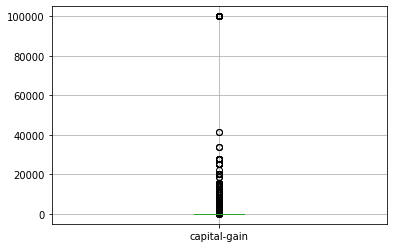

In [13]:
df.boxplot(column="capital-gain")

100,000 seems like an abitrary number, perhaps it was used as a placeholder. Regardless its an obvious outlier, lets remove it

In [14]:
df = df[df['capital-gain'] < 60000]
df.shape

(30024, 15)

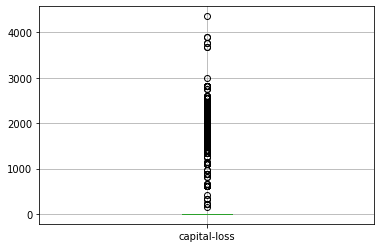

In [15]:
df.boxplot(column="capital-loss")

There are a few outliers but it doesn't seem too bad so we'll leave them

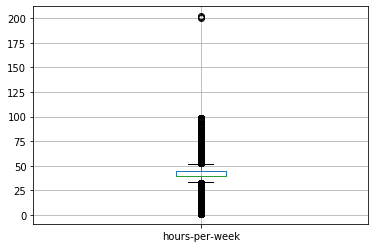

In [16]:
df.boxplot(column="hours-per-week")

There are only 168 hours in a week, so clearly these should be removed

In [17]:
df = df[df['hours-per-week'] < 168]
df.shape

(30021, 15)

Lets plot some relationships; first the text based ones.

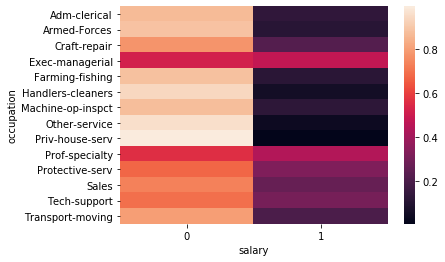

In [18]:
sns.heatmap(pd.crosstab(df['occupation'], df['salary']).div(pd.crosstab(df['occupation'], df['salary']).apply(sum,1),0))

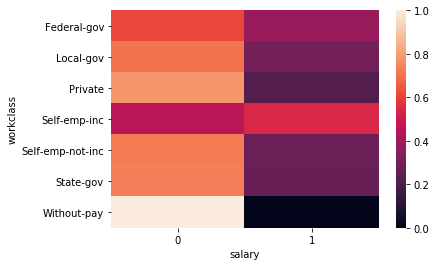

In [19]:
sns.heatmap(pd.crosstab(df['workclass'], df['salary']).div(pd.crosstab(df['workclass'], df['salary']).apply(sum,1),0))

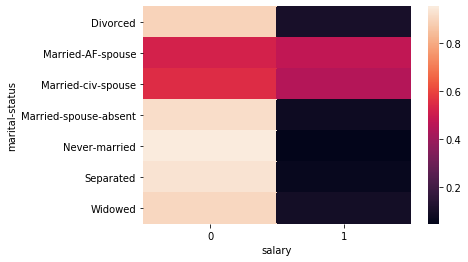

In [20]:
sns.heatmap(pd.crosstab(df['marital-status'], df['salary']).div(pd.crosstab(df['marital-status'], df['salary']).apply(sum,1),0))

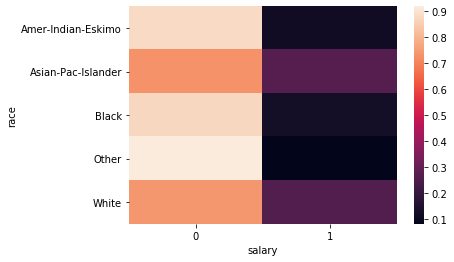

In [21]:
sns.heatmap(pd.crosstab(df['race'], df['salary']).div(pd.crosstab(df['race'], df['salary']).apply(sum,1),0))

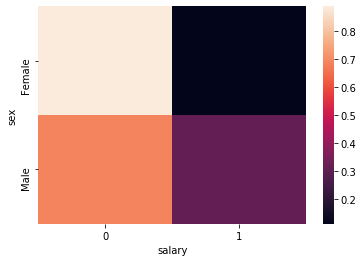

In [22]:
sns.heatmap(pd.crosstab(df['sex'], df['salary']).div(pd.crosstab(df['sex'], df['salary']).apply(sum,1),0))

Conclusions:
1. Managerial and specialties tend to make more money
2. Self employed workers tend to make more money
3. Married people tend to make more money
4. Men slightly tend to make more money than females.

Now, for the numeric correlations

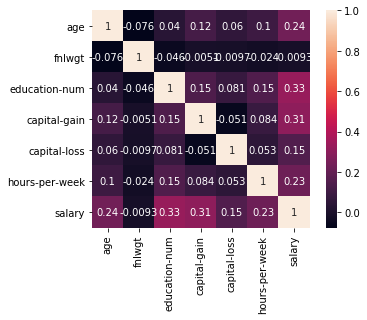

In [23]:
sns.heatmap(df[list(df.dtypes[df.dtypes != 'object'].index)].corr(),annot = True,square = True);

Conclusions:
1. Education, age, capital gain, hours per week all highly contribute to a person's likelihood of making more money
2. Highly educated people tend to work more hours, highly educated people tend to have a higher capital gain

# Data Transformation

- Education and education num are the same thing, so lets drop one.
- Relationship is basically sex combined with marital status, so lets drop it
- Fnlwgt was used to represent the weight of each type of person. Since we're trying to predict whether a single person's salary, its irrelevant to us so lets drop that too.

In [24]:
df.drop(inplace=True, columns=['education', 'relationship', 'fnlwgt'])

In [25]:
df.head()

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,0


Normalize Numerical Features

In [26]:
from sklearn.preprocessing import MinMaxScaler
num_col = df.dtypes[df.dtypes != 'object'].index
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(df, columns=[num_col])
df[num_col] = scaler.fit_transform(df[num_col])
df.head()

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.156,State-gov,0.800000,Never-married,Adm-clerical,White,Male,0.052626,0.0,0.397959,United-States,0.0
1,0.200,Self-emp-not-inc,0.800000,Married-civ-spouse,Exec-managerial,White,Male,0.000000,0.0,0.122449,United-States,0.0
2,0.152,Private,0.533333,Divorced,Handlers-cleaners,White,Male,0.000000,0.0,0.397959,United-States,0.0
3,0.212,Private,0.400000,Married-civ-spouse,Handlers-cleaners,Black,Male,0.000000,0.0,0.397959,United-States,0.0
4,0.112,Private,0.800000,Married-civ-spouse,Prof-specialty,Black,Female,0.000000,0.0,0.397959,Cuba,0.0


One hot encoding

In [27]:
df = pd.get_dummies(df, prefix=['workclass', 'marital-status', 'occupation', 'race', 'sex', 'native-country'], drop_first=True)
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.156,0.800000,0.052626,0.0,0.397959,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.200,0.800000,0.000000,0.0,0.122449,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.152,0.533333,0.000000,0.0,0.397959,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.212,0.400000,0.000000,0.0,0.397959,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.112,0.800000,0.000000,0.0,0.397959,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Split our data into training and test so we can evaluate our model after training

In [28]:
y = df['salary']
df.drop('salary', axis=1, inplace=True)
X = df

# Training

## SVM

In [29]:
from sklearn import metrics
from statistics import mean 
import random
svm_res =  {'accuracy':[],'f1':[],'precision':[],'recall':[]}
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random.randint(1,1000))
    model = svm.SVC(kernel="linear")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    svm_res['accuracy'].append(metrics.accuracy_score(y_test,y_pred))
    svm_res['f1'].append(metrics.f1_score(y_test,y_pred))
    svm_res['precision'].append(metrics.precision_score(y_test,y_pred))
    svm_res['recall'].append(metrics.recall_score(y_test,y_pred))
    if i==0:
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      4541
         1.0       0.72      0.58      0.64      1464

    accuracy                           0.84      6005
   macro avg       0.80      0.75      0.77      6005
weighted avg       0.84      0.84      0.84      6005

[[4217  324]
 [ 617  847]]


## Logistic Regression

In [30]:
logreg_res =  {'accuracy':[],'f1':[],'precision':[],'recall':[]}
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    logreg_res['accuracy'].append(metrics.accuracy_score(y_test,y_pred))
    logreg_res['f1'].append(metrics.f1_score(y_test,y_pred))
    logreg_res['precision'].append(metrics.precision_score(y_test,y_pred))
    logreg_res['recall'].append(metrics.recall_score(y_test,y_pred))
    if i==0:
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      4496
         1.0       0.74      0.57      0.64      1509

    accuracy                           0.84      6005
   macro avg       0.80      0.75      0.77      6005
weighted avg       0.83      0.84      0.83      6005

[[4194  302]
 [ 652  857]]


## Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

bayes_res =  {'accuracy':[],'f1':[],'precision':[],'recall':[]}
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random.randint(1,1000))
    model = GaussianNB()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    bayes_res['accuracy'].append(metrics.accuracy_score(y_test,y_pred))
    bayes_res['f1'].append(metrics.f1_score(y_test,y_pred))
    bayes_res['precision'].append(metrics.precision_score(y_test,y_pred))
    bayes_res['recall'].append(metrics.recall_score(y_test,y_pred))
    if i==0:
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.21      0.35      4588
         1.0       0.27      0.97      0.43      1417

    accuracy                           0.39      6005
   macro avg       0.61      0.59      0.39      6005
weighted avg       0.79      0.39      0.37      6005

[[ 975 3613]
 [  47 1370]]


## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtree_res =  {'accuracy':[],'f1':[],'precision':[],'recall':[]}
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random.randint(1,1000))
    model = DecisionTreeClassifier(max_depth=3)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    dtree_res['accuracy'].append(metrics.accuracy_score(y_test,y_pred))
    dtree_res['f1'].append(metrics.f1_score(y_test,y_pred))
    dtree_res['precision'].append(metrics.precision_score(y_test,y_pred))
    dtree_res['recall'].append(metrics.recall_score(y_test,y_pred))
    if i==0:
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      4489
         1.0       0.77      0.51      0.61      1516

    accuracy                           0.84      6005
   macro avg       0.81      0.73      0.75      6005
weighted avg       0.83      0.84      0.83      6005

[[4265  224]
 [ 750  766]]


## Random Forest

In [33]:
rforest_res =  {'accuracy':[],'f1':[],'precision':[],'recall':[]}
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random.randint(1,1000))
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rforest_res['accuracy'].append(metrics.accuracy_score(y_test,y_pred))
    rforest_res['f1'].append(metrics.f1_score(y_test,y_pred))
    rforest_res['precision'].append(metrics.precision_score(y_test,y_pred))
    rforest_res['recall'].append(metrics.recall_score(y_test,y_pred))
    if i==0:
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      4552
         1.0       0.70      0.62      0.65      1453

    accuracy                           0.84      6005
   macro avg       0.79      0.77      0.78      6005
weighted avg       0.84      0.84      0.84      6005

[[4159  393]
 [ 556  897]]


Calculate average scores for the K fold validation

In [35]:
results = {'Support Vector Machine':svm_res,'Logistic Regression':logreg_res,'Naive Bayes':bayes_res,'Decision Tree':dtree_res,'Random Forest':rforest_res}
for algo in results:
    for score in results[algo]:
        results[algo][score] = mean(results[algo][score])

In [36]:
pd.DataFrame(results).transpose().sort_values(by=['accuracy'], ascending=False)

,accuracy,f1,precision,recall
Support Vector Machine,0.846461,0.653227,0.727248,0.592986
Logistic Regression,0.845845,0.651503,0.730976,0.587738
Random Forest,0.843764,0.658334,0.709411,0.614295
Decision Tree,0.838052,0.605000,0.761951,0.501822
Naive Bayes,0.387194,0.435770,0.281097,0.969358


Almost all of the models are quite close, however naive bayes doesn't seem like a good fit for this data.

The support vector machine model seems to give the best results 